# Домашние работы курса "Алгоритмы и структуры данных"

### Красовский Р.М. (ИУ3-33БВ)
<br>

---
<a id="top"></a>
# Содержание
1. [Блок-схема и поиск ближайшего элемента](#Домашнее-задание-1)
2. [Инверсия пузырьком и бинарный поиск](#Домашнее-задание-2)
3. [Хэш-таблица](#Домашнее-задание-3)
4. [Бинарное дерево](#Домашнее-задание-4)
5. [Расстояние Дамерау-Левенштейна](#Домашнее-задание-5)
6. [Красно-черное дерево](#Домашнее-задание-6)
7. [Алгоритм Дейкстры](#Домашнее-задание-7)
8. [Поиск номеров с ошибкой](#Домашнее-задание-8)

---
<br><br>


# Домашнее задание 1


## Задача 1: блок-схема

<p align="center"# Домашнее задание №1</p>

Разработать блок-схему алгоритма и программу для вычисления площади треугольника S по заданным с клавиатуры значениям стороны a и высоты h, проведенной к этой стороне. Значение площади вывести на экран.

### Решение

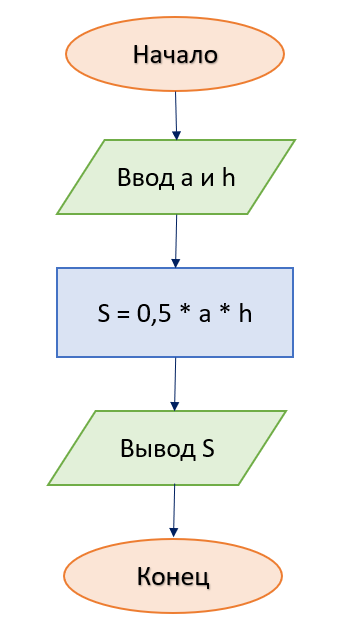

In [101]:
def calc_s(a, h):
    s = 0.5 * a * h
    return s

In [103]:
# Пример использования
a = 12
h = 17

print(f"Треугольник со стороной {a} и высотой {h} имеет площадь: ", calc_s(a, h))

Треугольник со стороной 12 и высотой 17 имеет площадь:  102.0


## Задача 2

Дано два массива A и B, элементами которых являются целые числа. Массив A отсортирован в порядке убывания.
Для каждого элемента массива B найти наиболее близкое число к данному в массиве A. Если таких несколько, то вывести оба.

### Решение

In [13]:
from typing import List, Tuple

def find_closest(A: List[int], B: List[int]) -> List[Tuple[int, List[int]]]:
    """
    Для каждого элемента массива B находит наиболее близкий элемент в массиве A.

    Алгоритм:
        - Для каждого элемента b из B вычисляется минимальная разница с элементами A.
        - Все элементы A, находящиеся на этом минимальном расстоянии, добавляются в результат.

    Args:
        A (List[int]): Отсортированный или несортированный массив, в котором ищем ближайшие значения.
        B (List[int]): Массив элементов, для которых ищем ближайшие значения в A.

    Returns:
        List[Tuple[int, List[int]]]: Список кортежей, где первый элемент — это значение из B, 
        а второй — список ближайших элементов из A.
    """
    results = []
    for b in B:
        min_diff = min(abs(a - b) for a in A)
        closest = [a for a in A if abs(a - b) == min_diff]
        results.append((b, closest))
    return results


In [14]:
# Пример использования
A = [65, 43, 23, 11, 7]
B = [3, 54, 23, 9, 65]

res = find_closest(A, B)
for b, closest in res:
    print(f"{b} - {' '.join(map(str, closest))}")


3 - 7
54 - 65 43
23 - 23
9 - 11 7
65 - 65


<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 2

## Задача 1: инверсия пузырьком

Задан целочисленный массив [12, 22, 11, 9, 54, 76, 23, 55, 98]. Требуется посчитать число инверсий (перемещений элементов с одной позиции на другую) в процессе сортировки элементов массива от большего к меньшему при использовании алгоритма сортировки «пузырьком».

Инверсия массива — это пара элементов, которые расположены «вне своего естественного порядка».

### Решение

In [20]:
def inversions_bubble(A: list[int]) -> int:
    """
    Считает число инверсий в массиве при сортировке пузырьком по убыванию.

    Инверсия — это пара элементов (i, j), где i < j, 
    но A[i] < A[j] для сортировки по убыванию, 
    то есть элементы находятся не на своих местах.

    Алгоритм:
        Перебирает все пары элементов (i, j) и считает количество инверсий.

    Args:
        A (list[int]): Список целых чисел.

    Returns:
        int: Общее количество инверсий в массиве.
    """
    n = len(A)
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            if A[i] < A[j]:
                count += 1
    return count


In [21]:
# Пример использования
A = [12, 22, 11, 9, 54, 76, 23, 55, 98]
print("Массив:", A)
print("Число инверсий:", inversions_bubble(A))


Массив: [12, 22, 11, 9, 54, 76, 23, 55, 98]
Число инверсий: 28


## Задача 2: бинарный поиск

Реализовать алгоритм бинарного поиска через рекурсию.

In [24]:
def binary_search(arr: list[int], x: int, left: int, right: int) -> int | None:
    """
    Выполняет бинарный поиск элемента в отсортированном списке рекурсивно.

    Функция делит диапазон поиска пополам на каждом шаге и рекурсивно вызывает
    себя для той половины, где потенциально может находиться элемент x.

    Args:
        arr (list[int]): Отсортированный список, в котором выполняется поиск.
        x (int): Искомое значение.
        left (int): Левая граница диапазона поиска (включительно).
        right (int): Правая граница диапазона поиска (включительно).

    Returns:
        int | None: Индекс найденного элемента, если он есть, иначе None.
    """
    if right < left:
        return None

    mid = (left + right) // 2

    if arr[mid] == x:
        return mid
    if x < arr[mid]:
        return binary_search(arr, x, left, mid - 1)
    else:
        return binary_search(arr, x, mid + 1, right)


In [25]:
# Пример использования
wins = [1223125, 2128437, 2128500, 2741001, 4567687, 4567890, 7495938, 9314543]
my_ticket = 9314543

index = binary_search(wins, my_ticket, left=0, right=len(wins) - 1)

if index is not None:
    print(f"Билет {my_ticket} найден на позиции {index}")
else:
    print(f"Билет {my_ticket} не найден в списке")


Билет 9314543 найден на позиции 7


<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 3

## Задача 1: хэш-таблица

In [29]:
class HashTable:
    """
    Реализация хэш-таблицы с методом открытой адресации (линейное пробирование).
    
    Хэш-функция вычисляется как остаток от деления длины ключа на 20.
    Для разрешения коллизий используется линейное пробирование.
    """
    
    def __init__(self, size=20):
        """
        Инициализирует хэш-таблицу.
        
        Args:
            size (int): Размер хэш-таблицы (по умолчанию 20)
        """
        self.size = size
        self.table = [None] * size
        self.deleted = object()  # Маркер для удаленных элементов
    
    def hash_function(self, key):
        """
        Вычисляет хэш ключа как остаток от деления длины ключа на 20.
        
        Args:
            key (str): Ключ для хэширования
            
        Returns:
            int: Хэш-значение в диапазоне [0, 19]
        """
        return len(key) % self.size
    
    def insert(self, key, value):
        """
        Вставляет пару ключ-значение в хэш-таблицу.
        
        Args:
            key (str): Ключ для вставки
            value: Значение для вставки
            
        Returns:
            bool: True если вставка успешна, False если таблица заполнена
        """
        index = self.hash_function(key)
        original_index = index
        
        # Линейное перебирание для поиска свободной ячейки
        while self.table[index] is not None and self.table[index] != self.deleted:
            if self.table[index][0] == key:  # Если ключ уже существует, обновляем значение
                self.table[index] = (key, value)
                return True
            index = (index + 1) % self.size
            if index == original_index:
                return False
        
        self.table[index] = (key, value)
        return True
    
    def search(self, key):
        """
        Ищет значение по ключу в хэш-таблице.
        
        Args:
            key (str): Ключ для поиска
            
        Returns:
            tuple | None: Кортеж (ключ, значение) если найден, иначе None
        """
        index = self.hash_function(key)
        original_index = index
        
        # Линейное перебирание для поиска ключа
        while self.table[index] is not None:
            if self.table[index] != self.deleted and self.table[index][0] == key:
                return self.table[index]
            index = (index + 1) % self.size
            if index == original_index:
                break
        
        return None
    
    def delete(self, key):
        """
        Удаляет пару ключ-значение из хэш-таблицы.
        
        Args:
            key (str): Ключ для удаления
            
        Returns:
            bool: True если удаление успешно, False если ключ не найден
        """
        index = self.hash_function(key)
        original_index = index
        
        # Линейное перебирание для поиска ключа
        while self.table[index] is not None:
            if self.table[index] != self.deleted and self.table[index][0] == key:
                self.table[index] = self.deleted
                return True
            index = (index + 1) % self.size
            if index == original_index:  # Прошли весь круг
                break
        
        return False
    
    def display(self):
        """
        Выводит содержимое хэш-таблицы.
        """
        print("Хэш-таблица:")
        print("Индекс | Ключ | Значение")
        print("-" * 30)
        for i in range(self.size):
            if self.table[i] is None:
                print(f"{i:6} | {'-':10} | {'-':8}")
            elif self.table[i] == self.deleted:
                print(f"{i:6} | {'[УДАЛЕНО]':10} | {'-':8}")
            else:
                key, value = self.table[i]
                print(f"{i:6} | {key:10} | {value:8}")

In [30]:
# Пример использования
hash_table = HashTable()

# Исходные данные для вставки
data = [
    ('Водоросли', 280),
    ('Картофель', 260),
    ('Лук-порей', 59),
    ('Манго', 291),
    ('Орехи грецкие', 266),
    ('Салями', 225),
    ('Специи', 283),
    ('Сыр сливочный', 152),
    ('Творог', 215),
    ('Тофу', 142),
    ('Хек', 248),
    ('Чай черный', 118),
    ('Чернила каракатицы', 95),
    ('Шампиньоны', 101),
    ('Финик', 104)
]

print("Добавление данных в хэш-таблицу:")
for key, value in data:
    hash_table.insert(key, value)
    print(f"Добавлено: '{key}': {value}")

print("\n" + "="*50)
hash_table.display()

print("\n" + "="*50)
print("Удаление данных из хэш-таблицы:")

# Удаление в заданном порядке
keys_to_delete = ['Орехи грецкие', 'Водоросли', 'Специи', 'Манго']

for key in keys_to_delete:
    if hash_table.delete(key):
        print(f"Удалено: '{key}'")
    else:
        print(f"Ключ '{key}' не найден")

print("\n" + "="*50)
print("Хэш-таблица после удаления:")
hash_table.display()

print("\n" + "="*50)
print("Проверка поиска некоторых элементов:")
test_keys = ['Картофель', 'Водоросли', 'Тофу', 'Манго']
for key in test_keys:
    result = hash_table.search(key)
    if result:
        print(f"Найдено: '{result[0]}': {result[1]}")
    else:
        print(f"Не найдено: '{key}'")

Добавление данных в хэш-таблицу:
Добавлено: 'Водоросли': 280
Добавлено: 'Картофель': 260
Добавлено: 'Лук-порей': 59
Добавлено: 'Манго': 291
Добавлено: 'Орехи грецкие': 266
Добавлено: 'Салями': 225
Добавлено: 'Специи': 283
Добавлено: 'Сыр сливочный': 152
Добавлено: 'Творог': 215
Добавлено: 'Тофу': 142
Добавлено: 'Хек': 248
Добавлено: 'Чай черный': 118
Добавлено: 'Чернила каракатицы': 95
Добавлено: 'Шампиньоны': 101
Добавлено: 'Финик': 104

Хэш-таблица:
Индекс | Ключ | Значение
------------------------------
     0 | -          | -       
     1 | -          | -       
     2 | -          | -       
     3 | Хек        |      248
     4 | Тофу       |      142
     5 | Манго      |      291
     6 | Салями     |      225
     7 | Специи     |      283
     8 | Творог     |      215
     9 | Водоросли  |      280
    10 | Картофель  |      260
    11 | Лук-порей  |       59
    12 | Чай черный |      118
    13 | Орехи грецкие |      266
    14 | Сыр сливочный |      152
    15 | Шампиньо

<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 4

## Задача 1: бинарное дерево

1. Для наборов чисел из строки «Добавить» построить бинарное дерево. Поочередно добавляя элементы в дерево в том порядке, в котором они даны; при необходимости выполнять балансировку дерева.  
2. Удалить из дерева указанные в строке «Удалить» варианта элементы в том порядке, в котором они даны; при необходимости выполнить балансировку дерева; пункт 2 выполняется после завершения пункта 1.

При добавлении необходимо выполнять балансировку после добавления каждого узла: сначала добавляем узел, затем балансируем. Аналогично для удаления: удаляем узел, а затем балансируем.

 - Добавить: 33, 40, 23, 26, 16, 11, 21, 17, 20, 18, 22, 46, 39, 43.
 - Удалить: 39, 21, 20.

### Решение

In [36]:
class Node:
    """
    Класс узла бинарного дерева.

    Атрибуты:
        key (int): значение ключа узла.
        left (Node): ссылка на левый дочерний узел.
        right (Node): ссылка на правый дочерний узел.
        height (int): высота узла в дереве (для балансировки).
    """
    def __init__(self, key: int):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1


class AVLTree:
    """
    Класс, реализующий AVL-дерево — самобалансирующееся бинарное дерево поиска.

    Основные операции:
        - insert(): вставка нового узла с балансировкой.
        - delete(): удаление узла с балансировкой.
        - inorder(): симметричный обход (возвращает отсортированный список ключей).
    """

    def get_height(self, node: Node) -> int:
        """Возвращает высоту узла или 0, если узел отсутствует."""
        return node.height if node else 0

    def get_balance(self, node: Node) -> int:
        """Вычисляет баланс-фактор (разность высот левого и правого поддерева)."""
        return self.get_height(node.left) - self.get_height(node.right) if node else 0

    def rotate_right(self, y: Node) -> Node:
        """
        Выполняет правый поворот вокруг узла y.
        
        Используется для устранения левого перекоса дерева.
        """
        x = y.left
        T2 = x.right

        # Поворот
        x.right = y
        y.left = T2

        # Обновление высот
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))

        return x

    def rotate_left(self, x: Node) -> Node:
        """
        Выполняет левый поворот вокруг узла x.
        
        Используется для устранения правого перекоса дерева.
        """
        y = x.right
        T2 = y.left

        # Поворот
        y.left = x
        x.right = T2

        # Обновление высот
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    def insert(self, root: Node, key: int) -> Node:
        """
        Вставляет новый узел с заданным ключом в дерево с корнем root.
        После вставки выполняет балансировку при необходимости.
        """
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)

        # Обновление высоты узла
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

        # Балансировка
        balance = self.get_balance(root)

        # Левое вращение
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)

        # Правое вращение
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)

        # Левый-правый случай
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        # Правый-левый случай
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def min_value_node(self, node: Node) -> Node:
        """Возвращает узел с минимальным ключом в данном поддереве."""
        current = node
        while current.left:
            current = current.left
        return current

    def delete(self, root: Node, key: int) -> Node:
        """
        Удаляет узел с заданным ключом из дерева с корнем root.
        После удаления выполняет балансировку дерева.
        """
        if not root:
            return root

        # Поиск удаляемого узла
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            # Один или ноль потомков
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            # Узел с двумя потомками — берём преемника
            temp = self.min_value_node(root.right)
            root.key = temp.key
            root.right = self.delete(root.right, temp.key)

        # Обновление высоты
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

        # Балансировка
        balance = self.get_balance(root)

        # Левое вращение
        if balance > 1 and self.get_balance(root.left) >= 0:
            return self.rotate_right(root)

        # Левый-правый случай
        if balance > 1 and self.get_balance(root.left) < 0:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        # Правое вращение
        if balance < -1 and self.get_balance(root.right) <= 0:
            return self.rotate_left(root)

        # Правый-левый случай
        if balance < -1 and self.get_balance(root.right) > 0:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def inorder(self, root: Node) -> list[int]:
        """Возвращает список ключей при симметричном обходе (лево–корень–право)."""
        if not root:
            return []
        return self.inorder(root.left) + [root.key] + self.inorder(root.right)


In [37]:
# Пример использования
if __name__ == "__main__":
    tree = AVLTree()
    root = None

    to_add = [33, 40, 23, 26, 16, 11, 21, 17, 20, 18, 22, 46, 39, 43]
    to_del = [39, 21, 20]

    for x in to_add:
        root = tree.insert(root, x)

    print("Дерево после добавления:")
    print(tree.inorder(root))

    for x in to_del:
        root = tree.delete(root, x)

    print("Дерево после удаления:")
    print(tree.inorder(root))


Дерево после добавления:
[11, 16, 17, 18, 20, 21, 22, 23, 26, 33, 39, 40, 43, 46]
Дерево после удаления:
[11, 16, 17, 18, 22, 23, 26, 33, 40, 43, 46]


<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 5

## Задача 1: расстояние Дамерау-Левенштейна

Вычислить расстояние Дамерау-Левенштейна для следующих пар слов:
 - Аббревиатура и Бабреваитуар,
 - Фуникулер и Уфнниуклер.

### Решение

In [43]:
def damerau_levenshtein(s1: str, s2: str) -> int:
    """
    Вычисляет расстояние Дамерау-Левенштейна между двумя строками.

    Расстояние Дамерау-Левенштейна учитывает:
        - вставку символа,
        - удаление символа,
        - замену символа,
        - транспозицию (обмен соседних символов).

    Args:
        s1 (str): Первая строка.
        s2 (str): Вторая строка.

    Returns:
        int: Минимальное количество операций для преобразования s1 в s2.
    """
    len1, len2 = len(s1), len(s2)
    d = [[0] * (len2 + 1) for _ in range(len1 + 1)]

    for i in range(len1 + 1):
        d[i][0] = i
    for j in range(len2 + 1):
        d[0][j] = j

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            d[i][j] = min(
                d[i - 1][j] + 1,      # удаление
                d[i][j - 1] + 1,      # вставка
                d[i - 1][j - 1] + cost  # замена
            )
            # проверка транспозиции
            if i > 1 and j > 1 and s1[i - 1] == s2[j - 2] and s1[i - 2] == s2[j - 1]:
                d[i][j] = min(d[i][j], d[i - 2][j - 2] + 1)
    return d[len1][len2]


In [44]:
# Пример использования
pairs = [
    ("Аббревиатура", "Бабреваитуар"),
    ("Фуникулер", "Уфнниуклер")
]

for w1, w2 in pairs:
    dist = damerau_levenshtein(w1, w2)
    print(f"Расстояние Дамерау-Левенштейна между '{w1}' и '{w2}': {dist}")


Расстояние Дамерау-Левенштейна между 'Аббревиатура' и 'Бабреваитуар': 4
Расстояние Дамерау-Левенштейна между 'Фуникулер' и 'Уфнниуклер': 4


<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 6

## Задача 1: красно-черное дерево

1. Для наборов чисел из строки «Добавить» в варианте построить красно-черное дерево. Необходимо добавить элементы в дерево в том порядке, в котором они даны. При необходимости выполнить балансировку дерева.  
 
2. Удалить из дерева указанные элементы из строки «Удалить» в варианте в том порядке, в котором они даны. При необходимости выполнить балансировку дерева. Пункт 2 выполняется после завершения пункта 1.

 - Добавить: 33, 40, 23, 26, 16, 11, 21, 17, 20, 18, 22, 46, 39, 43, - Удалить: 39, 21, 2.


### Решение

In [50]:
class RBNode:
    """
    Узел красно-черного дерева.

    Attributes:
        key (int): значение узла.
        color (str): red' или 'black'.
        left (RBNode | None): левый потомок.
        right (RBNode | None): правый потомок.
        parent (RBNode | None): родительский узел.
    """
    def __init__(self, key: int, color: str = 'red'):
        self.key = key
        self.color = color
        self.left = None
        self.right = None
        self.parent = None


class RedBlackTree:
    """
    Красно-чёрное дерево (Red-Black Tree) с поддержкой вставки и удаления.

    Методы:
        insert(key): вставка нового узла с балансировкой.
        delete(key): удаление узла с балансировкой.
        inorder(): возвращает список ключей в симметричном обходе.
    """
    def __init__(self):
        self.NIL = RBNode(0, color='black')  # универсальный NIL-узел
        self.root = self.NIL

    # ------------------ Вращения ------------------
    def left_rotate(self, x: RBNode):
        y = x.right
        x.right = y.left
        if y.left != self.NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x: RBNode):
        y = x.left
        x.left = y.right
        if y.right != self.NIL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    # ------------------ Вставка ------------------
    def insert(self, key: int):
        """Вставка узла с ключом key с балансировкой."""
        node = RBNode(key)
        node.left = self.NIL
        node.right = self.NIL

        y = None
        x = self.root
        while x != self.NIL:
            y = x
            if node.key < x.key:
                x = x.left
            else:
                x = x.right
        node.parent = y
        if y is None:
            self.root = node
        elif node.key < y.key:
            y.left = node
        else:
            y.right = node
        node.color = 'red'
        self.insert_fixup(node)

    def insert_fixup(self, z: RBNode):
        """Балансировка дерева после вставки."""
        while z.parent is not None and z.parent.color == 'red':
            if z.parent == z.parent.parent.left:
                y = z.parent.parent.right
                if y.color == 'red':
                    z.parent.color = 'black'
                    y.color = 'black'
                    z.parent.parent.color = 'red'
                    z = z.parent.parent
                else:
                    if z == z.parent.right:
                        z = z.parent
                        self.left_rotate(z)
                    z.parent.color = 'black'
                    z.parent.parent.color = 'red'
                    self.right_rotate(z.parent.parent)
            else:
                y = z.parent.parent.left
                if y.color == 'red':
                    z.parent.color = 'black'
                    y.color = 'black'
                    z.parent.parent.color = 'red'
                    z = z.parent.parent
                else:
                    if z == z.parent.left:
                        z = z.parent
                        self.right_rotate(z)
                    z.parent.color = 'black'
                    z.parent.parent.color = 'red'
                    self.left_rotate(z.parent.parent)
        self.root.color = 'black'

    # ------------------ Удаление ------------------
    def transplant(self, u: RBNode, v: RBNode):
        """Заменяет поддерево с корнем u на поддерево с корнем v."""
        if u.parent is None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    def minimum(self, node: RBNode) -> RBNode:
        while node.left != self.NIL:
            node = node.left
        return node

    def delete(self, key: int):
        """Удаление узла с ключом key с балансировкой."""
        z = self.root
        while z != self.NIL:
            if z.key == key:
                break
            elif key < z.key:
                z = z.left
            else:
                z = z.right
        if z == self.NIL:
            return  # узел не найден

        y = z
        y_original_color = y.color
        if z.left == self.NIL:
            x = z.right
            self.transplant(z, z.right)
        elif z.right == self.NIL:
            x = z.left
            self.transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 'black':
            self.delete_fixup(x)

    def delete_fixup(self, x: RBNode):
        """Балансировка дерева после удаления."""
        while x != self.root and x.color == 'black':
            if x == x.parent.left:
                w = x.parent.right
                if w.color == 'red':
                    w.color = 'black'
                    x.parent.color = 'red'
                    self.left_rotate(x.parent)
                    w = x.parent.right
                if w.left.color == 'black' and w.right.color == 'black':
                    w.color = 'red'
                    x = x.parent
                else:
                    if w.right.color == 'black':
                        w.left.color = 'black'
                        w.color = 'red'
                        self.right_rotate(w)
                        w = x.parent.right
                    w.color = x.parent.color
                    x.parent.color = 'black'
                    w.right.color = 'black'
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w.color == 'red':
                    w.color = 'black'
                    x.parent.color = 'red'
                    self.right_rotate(x.parent)
                    w = x.parent.left
                if w.right.color == 'black' and w.left.color == 'black':
                    w.color = 'red'
                    x = x.parent
                else:
                    if w.left.color == 'black':
                        w.right.color = 'black'
                        w.color = 'red'
                        self.left_rotate(w)
                        w = x.parent.left
                    w.color = x.parent.color
                    x.parent.color = 'black'
                    w.left.color = 'black'
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = 'black'

    # Обход
    def inorder_helper(self, node: RBNode, res: list[int]):
        if node != self.NIL:
            self.inorder_helper(node.left, res)
            res.append(node.key)
            self.inorder_helper(node.right, res)

    def inorder(self) -> list[int]:
        """Возвращает список ключей дерева в порядке возрастания."""
        res = []
        self.inorder_helper(self.root, res)
        return res


In [51]:
# Пример использования
tree = RedBlackTree()

# Добавление элементов
to_add = [33, 40, 23, 26, 16, 11, 21, 17, 20, 18, 22, 46, 39, 43]
for x in to_add:
    tree.insert(x)

print("Дерево после добавления:")
print(tree.inorder())

# Удаление элементов
to_delete = [39, 21, 2]  # 2 не существует, должно просто игнорироваться
for x in to_delete:
    tree.delete(x)

print("Дерево после удаления:")
print(tree.inorder())


Дерево после добавления:
[11, 16, 17, 18, 20, 21, 22, 23, 26, 33, 39, 40, 43, 46]
Дерево после удаления:
[11, 16, 17, 18, 20, 22, 23, 26, 33, 40, 43, 46]


<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 7

## Задача 1: алгоритм Дейкстры

Построить граф по таблице смежности. Вычислить кратчайшее расстояние от узла B до всех вершин, используя алгоритм Дейкстры.

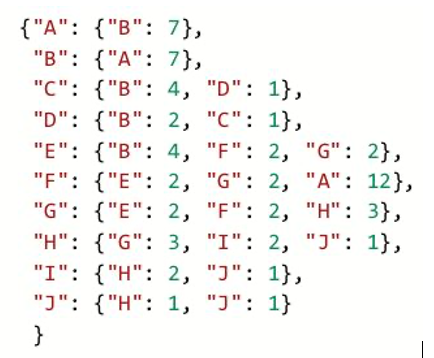

### Решение

TBD

<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>

# Домашнее задание 8

## Задача 1: поиск номеров с ошибкой

У большинства правовых актов или судебных решений есть определенный регистрационный номер, по которому их просто находить. При этом номер может состоять из цифр, букв, знаков препинания, примеры:
- 00-04-05/1809,
- 33-10000/10,
- 003/У-МС,
- А63-3110/2013,
- ПНАЭ Г-5-40-97,
- 23-НП,
- (17135)А07-СК-1/6/2007-Г-БАА.

Часто пользователи могут случайно ошибиться при вводе такого сложного номера – забыть поставить тире или пропустить нолик. В архиве «2numbers.rar» находится список всех реально существующих номеров законов и судебных решений, а также запросы, в которых номера были введены с ошибками. Предлагается реализовать алгоритм, который, получая на вход некорректный номер, возвращал один или несколько наиболее похожих на него реальных номеров. 
Примеры
- На запрос 0817/пзн нужно уметь находить «08-17/ПЗ-Н»,
- На запрос 140311/07539 нужно уметь находить «14-03-11/07-539»,
- На запрос ЯК373/12611 нужно уметь находить «ЯК-37-3/12611@».


### Решение

TBD

<br>

#### [⬆ Назад к содержанию](#top)

---

<br><br><br>